# Pymaceuticals Inc. 

## Analysis: 

#### The generated bar graph shows a comparison of timepoints with each drug regimen. Capomulin has the most amount of timepoints while Propriva has the least amount of timepoints. 

#### The generated pie plot shows that the entire study is closely split between male and female mice. Female mice made up for 49% of the population, whereas male mice accounted for 51% of the total population. 

#### In the comparison shown in the box plot, the final tumor volume remained lowest with Capomulin and Ramicane when compared to Infubinol and Ceftamin. 

#### The correlation of a mouse weight and average tumor volume is 0.84. This can be considered a strong correlation and shows that as the mouse weight is increasing then the tumor volume is also increasing. 

In [96]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"] )
#on is identifying what is the same in both datasets
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
# mice_count = len(mouse_metadata)
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
# Optional: Get all the data for the duplicate mouse ID. 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data_count = clean_data["Mouse ID"].nunique()
clean_data_count

248

## Summary Statistics

In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_data.groupby("Drug Regimen")
drug_regimen.groups 
#.groups all the rows with the values
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_mean = drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_var = drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_std = drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({"Tumor Mean": drug_regimen_mean})
# COMPLETE
drug_regimen_df

,Tumor Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_regimen_easy = drug_regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_easy

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

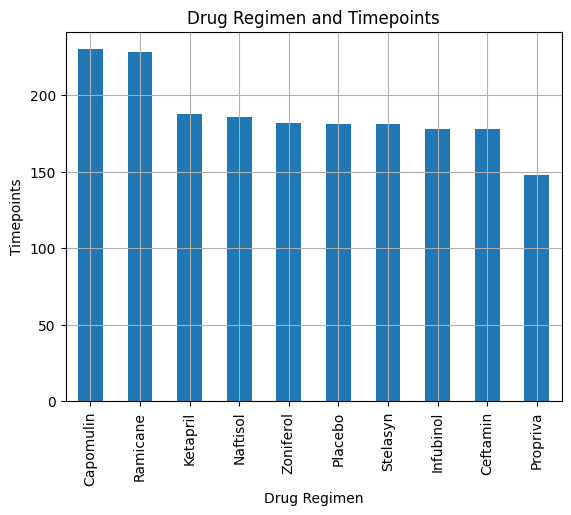

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_data["Drug Regimen"].value_counts()
bar_data.plot.bar()
plt.grid(True)
plt.ylabel("Timepoints")
plt.title("Drug Regimen and Timepoints")
plt.show()

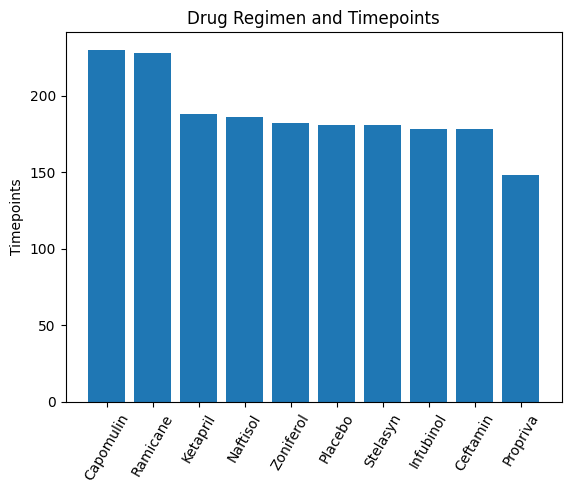

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_data.index, bar_data.values)
plt.xticks(rotation = 60)
plt.ylabel("Timepoints")
plt.title("Drug Regimen and Timepoints")
plt.show()

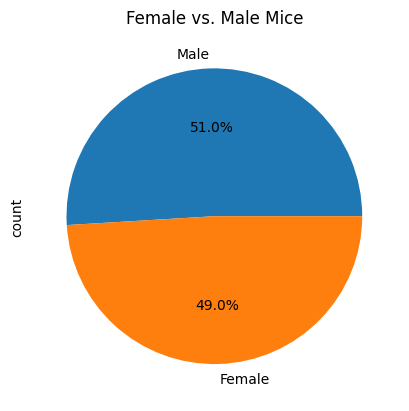

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.title("Female vs. Male Mice")
pie_data = clean_data[("Sex")].value_counts()
#needed to use value_counts over counts so it can show me how many in each value not just male and female
pie_data.plot(kind = "pie", autopct= "%1.1f%%")
plt.show()

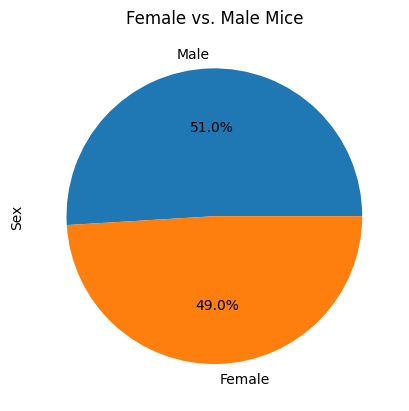

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Female vs. Male Mice")
plot = pie_data.plot.pie(y ="Total Count", autopct= "%1.1f%%" )
plt.ylabel("Sex") #ylabel needs to be after pie plot to show up this order matters
plt.show()

## Quartiles, Outliers, and Boxplots

In [14]:
#split the coding between each regimen for organization

#### Capomulin

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
capomulin_final_tumor = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse
last_capumulin = capomulin_final_tumor.groupby("Mouse ID").max()["Timepoint"]
cap_final_volume = pd.DataFrame(last_capumulin)
    #similar to how I located data at beginning with the merged data to clean. 
    #create new df, where locate data where, what column, != or ==

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_cap = pd.merge(cap_final_volume, clean_data, on = ("Mouse ID", "Timepoint"), how="left")
    #want left join we want all the mouse IDs first then final timepoints

# Determine outliers using upper and lower bounds
cap_tumors = merged_cap["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#this is using pandas to give quartile calculations
quartiles = cap_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq #the range of the middle 50% of sample, assess variability of where most values lie

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}") 
    # larger values show central portion of data is spread out further vs smaller values means data clusters more tightly

lb = lowerq - (1.5 * iqr)
ub = upperq + (1.5 * iqr)

print(f"Possible outliers: {lb} and {ub}")

Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range: 7.781863460000004
Possible outliers: 20.70456164999999 and 51.83201549


#### Ramicane

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
ramicane_final_tumor = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]

# Start by getting the last (greatest) timepoint for each mouse
last_ramicane = ramicane_final_tumor.groupby("Mouse ID").max()["Timepoint"]
ram_final_volume = pd.DataFrame(last_ramicane)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_ram = pd.merge(ram_final_volume, clean_data, on = ("Mouse ID", "Timepoint"), how="left")
    #want left join we want all the mouse IDs first then final timepoints
# merged_ram.head()

ram_tumors = merged_ram["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ram_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq 

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}") 

lb = lowerq - (1.5 * iqr)
ub = upperq + (1.5 * iqr)

print(f"Possible outliers: {lb} and {ub}")


Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range: 9.098536719999998
Possible outliers: 17.912664470000003 and 54.30681135


#### Infubinol

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
infubinol_final_tumor = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]

# Start by getting the last (greatest) timepoint for each mouse
last_infubinol = infubinol_final_tumor.groupby("Mouse ID").max()["Timepoint"]
inf_final_volume = pd.DataFrame(last_infubinol)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_inf = pd.merge(inf_final_volume, clean_data, on = ("Mouse ID", "Timepoint"), how="left")
# merged_inf.head()

inf_tumors = merged_inf["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = inf_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq 

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}") 

lb = lowerq - (1.5 * iqr)
ub = upperq + (1.5 * iqr)

print(f"Possible outliers: {lb} and {ub}")

Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range: 11.477135160000003
Possible outliers: 36.83290494999999 and 82.74144559000001


#### Ceftamin

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
ceftamin_final_tumor = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
last_ceftamin = ceftamin_final_tumor.groupby("Mouse ID").max()["Timepoint"]
cef_final_volume = pd.DataFrame(last_ceftamin)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_cef = pd.merge(cef_final_volume, clean_data, on = ("Mouse ID", "Timepoint"), how="left")
# merged_cef.head()

cef_tumors = merged_cef["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cef_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq 

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}") 

lb = lowerq - (1.5 * iqr)
ub = upperq + (1.5 * iqr)

print(f"Possible outliers: {lb} and {ub}")

Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Interquartile Range: 15.577752179999997
Possible outliers: 25.355449580000002 and 87.66645829999999


In [125]:
#this is mostly commented out for me to cover with my tutor on Wednesday (first available is after due date)

# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
cap_final_volume
ram_final_volume
inf_final_volume
cef_final_volume

# # Start by getting the last (greatest) timepoint for each mouse
last_timepoint = [cap_final_volume, ram_final_volume, inf_final_volume,cef_final_volume]
last_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# merged_all = pd.merge(last_timepoint, clean_data, on = ("Mouse ID", "Timepoint"), how="left")
# merged_cap.head()

# # Put treatments into a list for for loop (and later for plot labels)
# # treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# # Create empty list to fill with tumor vol data (for plotting)
# # Locate the rows which contain mice on each drug and get the tumor volumes
# # add subset 
# # tumor_vol_list = []
# #     for drug in treatment_list: 
#         #not exactly sure what to do here have it look say the drugs and tumor sizes?   
        
# # Determine outliers using upper and lower bounds
# cap_tumors = merged_cap["Tumor Volume (mm3)"]

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# #this is using pandas to give quartile calculations
# quartiles = cap_tumors.quantile([0.25, 0.5, 0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq #the range of the middle 50% of sample, assess variability of where most values lie

# print(f"Lower Quartile: {lowerq}")
# print(f"Upper Quartile: {upperq}")
# print(f"Interquartile Range: {iqr}") 
#     # larger values show central portion of data is spread out further vs smaller values means data clusters more tightly

# lb = lowerq - (1.5 * iqr)
# ub = upperq + (1.5 * iqr)

# print(f"Possible outliers: {lb} and {ub}")
# # tumor_vol_list

[          Timepoint
 Mouse ID           
 b128             45
 b742             45
 f966             20
 g288             45
 g316             45
 i557             45
 i738             45
 j119             45
 j246             35
 l509             45
 l897             45
 m601             45
 m957             45
 r157             15
 r554             45
 r944             45
 s185             45
 s710             45
 t565             45
 u364             45
 v923             45
 w150             10
 w914             45
 x401             45
 y793             45,
           Timepoint
 Mouse ID           
 a411             45
 a444             45
 a520             45
 a644             45
 c458             30
 c758             45
 d251             45
 e662             45
 g791             45
 i177             45
 i334             45
 j913             45
 j989             45
 k403             45
 m546             45
 n364             45
 q597             45
 q610             35
 r811       

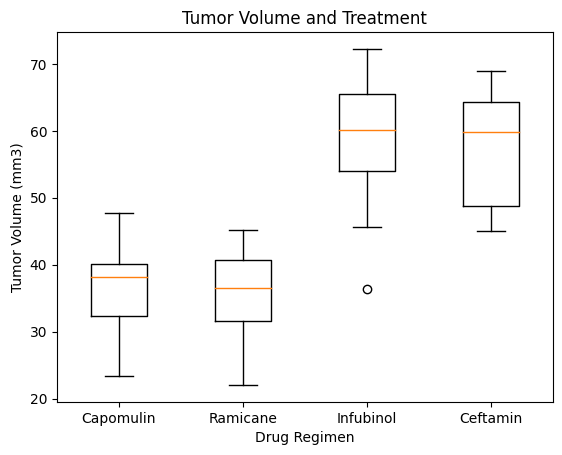

In [113]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
volume_plots = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
# treatment_list = clean_data.loc[("Drug Regimen")]
# treatment_list = clean_data[("Capomulin", "Ramicane", "Infubinol", "Ceftamin")]
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume and Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(volume_plots, labels = treatment_list)
plt.show()


## Line and Scatter Plots

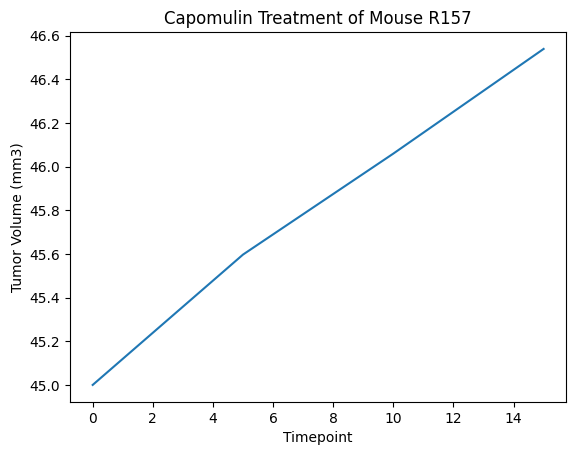

In [114]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# "r157","Capomulin","Male",22,25

r157_line = capomulin_final_tumor.loc[capomulin_final_tumor["Mouse ID"] == "r157",:]
        #  ,: is giving me every row with r157
r157_line.head()

x_axis = r157_line["Timepoint"]
y_axis = r157_line["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse R157")
plt.show()

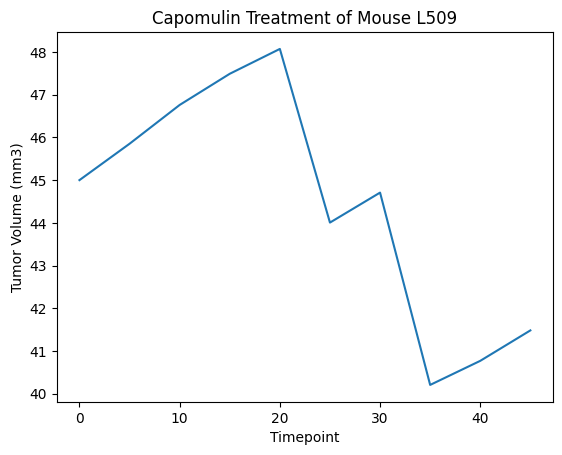

In [115]:
# "l509","Capomulin","Male",17,21
# was thrown off by the tumor not decreasing in the above output so used the same mouse as shown
# in the sample output to double check my work
l509_line = capomulin_final_tumor.loc[capomulin_final_tumor["Mouse ID"] == "l509",:]
        
l509_line.head()

x_axis = l509_line["Timepoint"]
y_axis = l509_line["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")
plt.show()

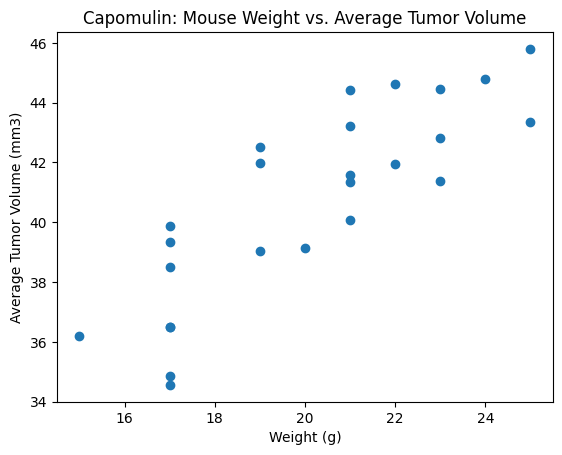

In [118]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mean_volume = capomulin_final_tumor.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
# break it down to make sense 
# capomulin_final_tumor
# capomulin_final_tumor[['Weight (g)', 'Tumor Volume (mm3)']]
# capomulin_final_tumor[['Weight (g)', 'Tumor Volume (mm3)']].mean()
# capomulin_final_tumor.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(mean_volume["Weight (g)"], mean_volume["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume")
plt.show()
# mean_volume.head()

## Correlation and Regression

In [109]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# mean volume pulled from cell above. 
correlation = st.pearsonr(mean_volume["Weight (g)"], mean_volume['Tumor Volume (mm3)'])
print(f"Correlation of mouse weight and average tumor volume: {round(correlation[0],2)} ")


Correlation of mouse weight and average tumor volume: 0.84 


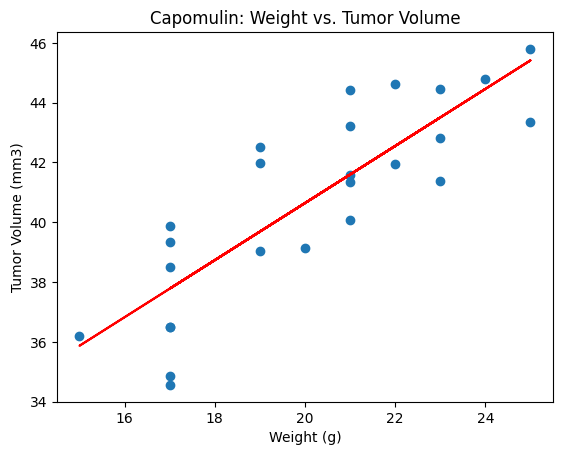

In [112]:
# linear regression

x_values = mean_volume["Weight (g)"]
y_values = mean_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress,"r-")
plt.annotate(line_eq,(10,20), fontsize=15)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin: Weight vs. Tumor Volume")
plt.show()